### All of Statistics | Larry Wasserman | Solutions and Code by David A. Lee
### Chapter 1: Probability

In [1]:
import numpy as np
from numpy.random import choice
import random
import matplotlib.pyplot as plt
import scienceplots

5. Suppose we toss a fair coin until we get exactly two heads. Describe the sample space $S$. What is the probability that exactly $k$ tosses are required?

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


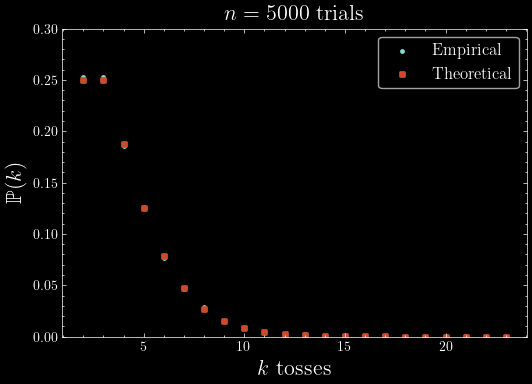

In [1095]:
def cointoss(): # coin tosses until we flip two heads
    tosses, heads = [], 0
    while (heads < 2):
        flip = random.randint(0,1)
        if (flip == 0):
            tosses.append('Heads')
            heads = tosses.count('Heads')
        else:
            tosses.append('Tails')
    return len(tosses)

def empirical(n): # empirically modeling the coin toss
    numtosses, probs = [], []
    for i in range(0,n):
        numtosses.append(cointoss())
    for x in np.unique(numtosses): # count amount of each unique number of tosses
        probs.append((x, numtosses.count(x)/n))
    return probs

def theoretical(): # theoretical model of the coin toss
    probs = []
    for i in range(2,24):
        probs.append((i, (i-1)*(0.5)**i))
    return probs

n = 5000

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
emp = plt.scatter(*zip(*empirical(n)), marker='.', color="#86dad4", linewidths=2) # use zip function since empirical(), theoretical() output list of tuples
theo = plt.scatter(*zip(*theoretical()), marker='s', color="#ca4c2b", linewidths=2)
plt.title('$n={}$ trials'.format(n), fontsize=16)
plt.xlabel('$k$ tosses', fontsize=16)
plt.ylabel('$\mathbb{P}(k)$', fontsize=16)
plt.ylim(0, 0.3)
plt.legend((emp, theo), ('Empirical', 'Theoretical'), loc= 'upper right', frameon=True, fontsize=12)
plt.savefig('chap1ex5.eps', format='eps')
plt.show()

# Interpretation: for n trials, the probability that we needed k tosses to get exactly two heads is P(k)..

10. You have probably heard it before. Now you can solve it rigorously. It is called the "Monty Hall Problem." A prize is placed at random behind one of three doors. You pick a door. To be concrete, let's suppose you always pick door 1. Now Monty Hall chooses one of the other two doors, opens it and shows you that it is empty. He then gives you the opportunity to keep your door or switch to the other unopened door. Should you stay or switch? Intuition suggests it doesn't matter. The correct answer is that you should switch. Prove it. It will help to specify the sample space and the relevant events carefully. Thus write $\Omega = \{ (\omega_1, \omega_2): \omega_i \in \{1,2,3\} \}$ where $\omega_1$ is where the prize is and $\omega_2$ is the door Monty opens.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


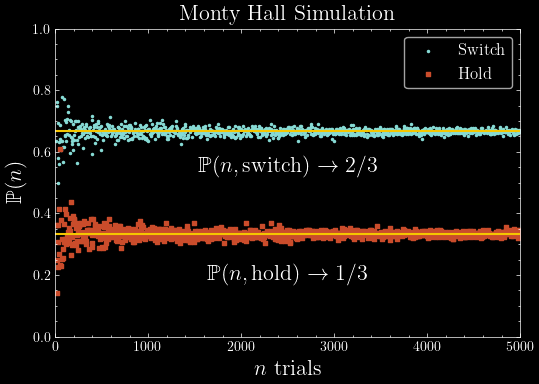

In [3]:
def montyhallswitch(): # monty hall problem setup (switch doors)
    doors = list(range(2, 4))
    prizedoor = random.randint(1,3)
    if (prizedoor == 2 or prizedoor == 3): # if prize is door 2 or 3, Monty picks the door that does not have the prize
        montydoors = [x for x in doors if x != prizedoor]
        montypicks = montydoors[0]
    else:
        montypicks = random.randint(2,3) # otherwise, Monty randomly chooses between doors 2 or 3
    doors.remove(montypicks)
    yourswitch = doors[0]
    return(prizedoor == yourswitch)

def montyhallhold(): # monty hall problem setup (hold door)
    prizedoor = random.randint(1,3)
    return(prizedoor == 1)

def iterationswitch(n): # run the Monty Hall game n times, switching
    runs = []
    for i in range(1,n+1):
        runs.append(montyhallswitch())
    probs = runs.count(True)/(n+1)
    return probs

def iterationhold(n): # run the Monty Hall game n times, holding
    runs = []
    for i in range(1,n+1):
        runs.append(montyhallhold())
    probs = runs.count(True)/(n+1)
    return probs

n = 5000
trials = list(range(10, n+1, 5)) # create list for numbers of trials
switchprob, holdprob = [], []
for i in trials: # iterate through probabilities for switching and holding for each number of trials
    switchprob.append(iterationswitch(i))
    holdprob.append(iterationhold(i))

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
switch = plt.scatter(trials, switchprob, marker='.', color="#86dad4", linewidths=1)
hold = plt.scatter(trials, holdprob, marker='s', color="#ca4c2b", linewidths=1)
plt.hlines(1/3, 0, n, colors="#f5c600", linestyles='solid', linewidths=1.5, label='asfd')
plt.text(n/2, 0.2, '$\mathbb{P}(n, \\text{hold}) \\rightarrow 1/3$', ha='center', va='center', fontsize=16)
plt.text(n/2, 0.55, '$\mathbb{P}(n, \\text{switch}) \\rightarrow 2/3$', ha='center', va='center', fontsize=16)
plt.hlines(2/3, 0, n, colors="#f5c600", linestyles='solid', linewidths=1.5)
plt.title('Monty Hall Simulation', fontsize=16)
plt.xlabel('$n$ trials', fontsize=16)
plt.ylabel('$\mathbb{P}(n)$', fontsize=16)
plt.xlim(0,n)
plt.ylim(0,1)
plt.legend((switch, hold), ('Switch', 'Hold'), loc= 'upper right', frameon=True, fontsize=12)
plt.savefig('chap1ex10.eps', format='eps')
plt.show()

12. There are three cards. The first is green on both sides, the second is red on both sides and the third is green on one side and red on the other. We choose a card at random and we see one side (also chosen at random). If the side we see if is green, what is the probability that the other side is also green? Many people intuitively answer $1/2$. Show that the correct answer is $2/3$.

Failed to find a Ghostscript installation.  Distillation step skipped.


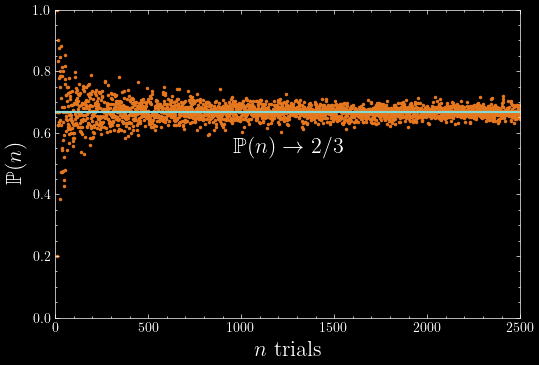

In [1096]:
def cardgame(): 
    first, second, third = ('G','G'), ('R','R'), ('G','R')
    mychoice = random.choice([first, second, third])
    myside = random.choice(mychoice)
    if (myside == 'G' and 'R' not in mychoice):
        return(True, True) # Draw green from GG
    elif (myside == 'G' and 'R' in mychoice):
        return(True, False) # Draw green from GR
    else:
        return(False, False) # Fail to draw green
    
def iteration(n): # run the card game n times
    runs = []
    for i in range(1,n+1):
        runs.append(cardgame())
    probs = runs.count((True, True))/(runs.count((True, True)) + runs.count((True, False)))
    return probs

n=2500
games = list(range(10, n+1))
cardprob = []
for i in games: # iterate through probabilities for switching and holding for each number of trials
    cardprob.append(iteration(i))

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
trials = plt.scatter(range(10,n+1),cardprob, marker='.', color="#e5771e", linewidths=1)
plt.text(n/2, 0.55, '$\mathbb{P}(n) \\rightarrow 2/3$', ha='center', va='center', fontsize=16)
plt.hlines(2/3, 0, n, colors="#86dad4", linestyles='solid', linewidths=1.5)
plt.xlabel('$n$ trials', fontsize=16)
plt.ylabel('$\mathbb{P}(n)$', fontsize=16)
plt.xlim(0,n)
plt.ylim(0,1)
plt.savefig('chap1ex12.eps', format='eps')
plt.show()

13. Suppose that a fair coin is tossed repeatedly until both a head and tail have appeared at least once.

Failed to find a Ghostscript installation.  Distillation step skipped.


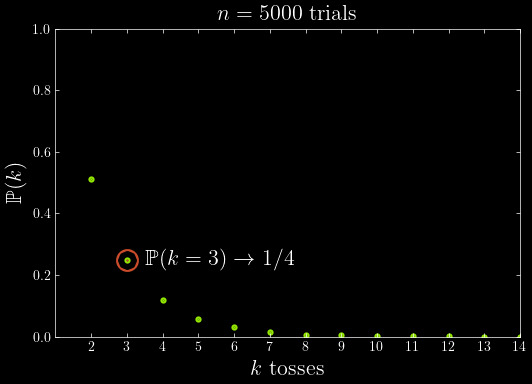

In [1100]:
def cointoss(): # coin tosses until we flip one head and one tails
    tosses, heads, tails = [], 0, 0
    while (heads < 1 or tails < 1):
        flip = random.randint(0,1)
        if (flip == 0):
            tosses.append('Heads')
            heads = tosses.count('Heads')
        else:
            tosses.append('Tails')
            tails = tosses.count('Tails')
    return len(tosses)

def empirical(n): # empirically modeling the coin toss
    numtosses, probs = [], []
    for i in range(0,n):
        numtosses.append(cointoss())
    for x in np.unique(numtosses): # count amount of each unique number of tosses
        probs.append((x, numtosses.count(x)/n))
    return probs

n = 5000

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
emp = plt.scatter(*zip(*empirical(n)), marker='.', color="#94e700", linewidths=3) # use zip function since empirical(), theoretical() output list of tuples
plt.scatter(3, 0.25, marker='.', color="#ca4c2b", linewidths=15)
plt.text(3.5, 0.25, '$\mathbb{P}(k=3) \\rightarrow 1/4$', ha='left', va='center', fontsize=16)
plt.title('$n={}$ trials'.format(n), fontsize=16)
plt.xlabel('$k$ tosses', fontsize=16)
plt.ylabel('$\mathbb{P}(k)$', fontsize=16)
plt.xlim(1,14)
plt.ylim(0, 1)
plt.xticks(np.arange(2,15,1))
plt.minorticks_off()
plt.savefig('chap1ex13.eps', format='eps')
plt.show()

20. A box contains 5 coins and each has a different probability of showing heads. Let $p_1, ..., p_5$ denote the probability of heads on each coin. Suppose that

$$    p_1 = 0, \ p_2 = 1/4, \ p_3 = 1/2, \ p_4 = 3/4 \ \text{ and } \ p_5 = 1 $$

Let $H$ denote "heads is obtained" and let $C_i$ denote the event that coin $i$ is selected.

(a) Select a coin at random and toss it. Suppose a head is obainted. What is the posterior probability that coin $i$ was selected $(i = 1, ..., 5)$? In other words, find $\mathbb{P}(C_i | H)$ for $i = 1, ..., 5$.

Failed to find a Ghostscript installation.  Distillation step skipped.


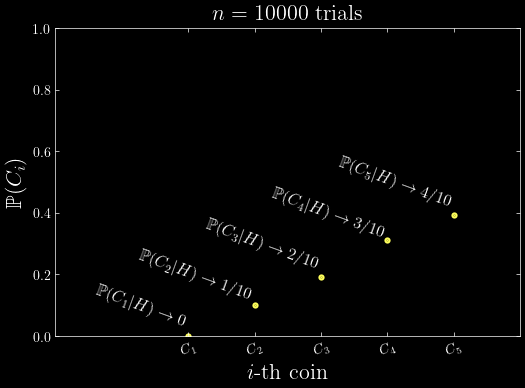

In [1101]:
def coinselect():
  coin = random.randint(1,5)
  return coin

def coinprob(i):
  coinface = ['H', 'T']
  headsprob=[0, 0.25, 0.5, 0.75, 1]
  randomFace = choice(  # argument i is the function coinselect(). Depending on random selection of coin, the corresponding probability of heads is chosen.
    coinface, 1, p=[headsprob[i-1], 1-headsprob[i-1]])
  return randomFace[0], i

def iteration(n):
  sample, probs = [], []
  for i in range(1,n):
    sample.append(coinprob(coinselect()))
  heads = len([i for i in sample if 'H' in i])
  for i in list(range(1,6)):
    probs.append(sample.count(('H',i)) / heads)
  return probs

n = 10000

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
plt.scatter(list(range(1,6)), iteration(n), marker='.', color="#feff5b", linewidths=3) 
plt.title('$n={}$ trials'.format(n), fontsize=16)
plt.xlabel('$i$-th coin', fontsize=16)
plt.ylabel('$\mathbb{P}(C_i)$', fontsize=16)
plt.xlim(-1,6)
plt.xticks(np.arange(1,6,1), 
           ['$C_1$', '$C_2$', '$C_3$', '$C_4$', '$C_5$'],
            rotation=20)
plt.ylim(0, 1)
plt.text(1, 0.1, '$\mathbb{P}(C_1 | H) \\rightarrow 0$', ha='right', va='center', fontsize=12, rotation=-20)
plt.text(2, 0.2, '$\mathbb{P}(C_2 | H) \\rightarrow 1/10$', ha='right', va='center', fontsize=12, rotation=-20)
plt.text(3, 0.3, '$\mathbb{P}(C_3 | H) \\rightarrow 2/10$', ha='right', va='center', fontsize=12, rotation=-20)
plt.text(4, 0.4, '$\mathbb{P}(C_4 | H) \\rightarrow 3/10$', ha='right', va='center', fontsize=12, rotation=-20)
plt.text(5, 0.5, '$\mathbb{P}(C_5 | H) \\rightarrow 4/10$', ha='right', va='center', fontsize=12, rotation=-20)
plt.minorticks_off()
plt.savefig('chap1ex20a.eps', format='eps')
plt.show()


(b) Toss the coin again. What is the probability of another head? In other words find $\mathbb{P}(H_2 | H_1)$ where $H_j = $ "heads on toss $j$."

Failed to find a Ghostscript installation.  Distillation step skipped.


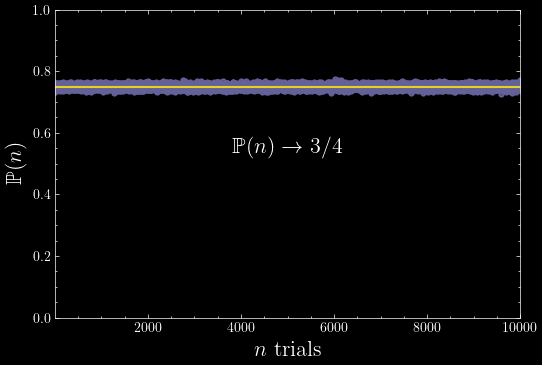

In [1012]:
def coinselect():
  coin = random.randint(1,5)
  return coin

def coinprob(i, k): # (coinselect(), number of tosses for the drawn coin)
  coinface = ['H', 'T']
  headsprob=[0, 0.25, 0.5, 0.75, 1]
  randomFace = choice(  # argument i is the function coinselect(). Depending on random selection of coin, the corresponding probability of heads is chosen.
    coinface, k, p=[headsprob[i-1], 1-headsprob[i-1]])
  return randomFace.tolist(), i

def iteration(n):
  sample, probs = [], []
  for i in range(1,n):
    sample.append(coinprob(coinselect(), k))
  firsttossheads = len([i for i in sample if ['H', 'H'] in i or ['H', 'T'] in i])
  for i in range(1,6):
    probs.append(sample.count((['H','H'],i)) / firsttossheads) # joint probability of C_i, B_4
  #doubleheads = len([i for i in sample if ['H', 'H'] in i]) # (alternative code)
  return sum(probs)

n, k, probs = 10000, 2, []

for i in range(10,n+1):
  probs.append(iteration(n)) # bulk of runtime

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
plt.scatter(list(range(10,n+1)), probs, marker='.', color="#646199", linewidths=3) 
plt.text(n/2, 0.55, '$\mathbb{P}(n) \\rightarrow 3/4$', ha='center', va='center', fontsize=16)
plt.hlines(3/4, 0, n, colors="#e6d021", linestyles='solid', linewidths=1.5)
plt.xlabel('$n$ trials', fontsize=16)
plt.ylabel('$\mathbb{P}(n)$', fontsize=16)
plt.xlim(10,n)
plt.ylim(0,1)
plt.savefig('chap1ex20b.eps', format='eps')
plt.show()

(c) Find $\mathbb{P}(C_i | B_4)$ where $B_4 =$ "first head is obtained on toss 4."

Failed to find a Ghostscript installation.  Distillation step skipped.


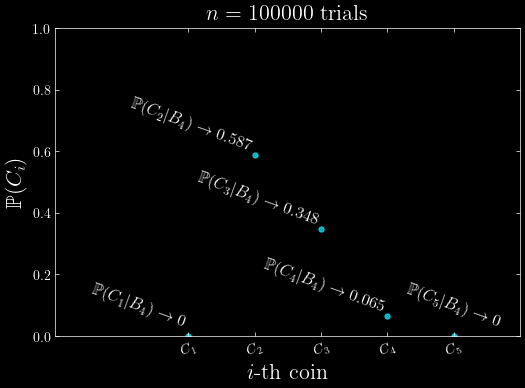

In [1102]:
def coinselect():
  coin = random.randint(1,5)
  return coin

def coinprob(i, k): # (coinselect(), number of tosses for the drawn coin)
  coinface = ['H', 'T']
  headsprob=[0, 0.25, 0.5, 0.75, 1]
  randomFace = choice(  # argument i is the function coinselect(). Depending on random selection of coin, the corresponding probability of heads is chosen.
    coinface, k, p=[headsprob[i-1], 1-headsprob[i-1]])
  return randomFace.tolist(), i

def iteration(n):
  sample, probs = [], []
  for i in range(1,n):
    sample.append(coinprob(coinselect(),k))
  threetails = len([i for i in sample if ['T', 'T', 'T', 'H'] in i])
  for i in range(1,6):
    probs.append((i, sample.count((['T', 'T', 'T', 'H'],i)) / threetails)) # joint probability of C_i, B_4
  return probs

n, k = 100000, 4
iteration(n)

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
plt.scatter(*zip(*iteration(n)), marker='.', color="#00c8d8", linewidths=3) 
plt.title('$n={}$ trials'.format(n), fontsize=16)
plt.xlabel('$i$-th coin', fontsize=16)
plt.ylabel('$\mathbb{P}(C_i)$', fontsize=16)
plt.xlim(-1,6)
plt.xticks(np.arange(1,6,1), 
           ['$C_1$', '$C_2$', '$C_3$', '$C_4$', '$C_5$'],
            rotation=20)
plt.ylim(0, 1)
plt.text(1, 0.1, '$\mathbb{P}(C_1 | B_4) \\rightarrow 0$', ha='right', va='center', fontsize=12, rotation=-20)
plt.text(2, 0.687, '$\mathbb{P}(C_2 | B_4) \\rightarrow 0.587$', ha='right', va='center', fontsize=12, rotation=-20)
plt.text(3, 0.448, '$\mathbb{P}(C_3 | B_4) \\rightarrow 0.348$', ha='right', va='center', fontsize=12, rotation=-20)
plt.text(4, 0.165, '$\mathbb{P}(C_4 | B_4) \\rightarrow 0.065$', ha='right', va='center', fontsize=12, rotation=-20)
plt.text(5, 0.1, '$\mathbb{P}(C_5 | B_4) \\rightarrow 0$', ha='center', va='center', fontsize=12, rotation=-20)
plt.minorticks_off()
plt.savefig('chap1ex20c.eps', format='eps')
plt.show()

21. (Computer Experiment.) Suppose a coin has probability $p$ of falling heads up. If we flip the coin many times, we would expect the proportion of heads to be near $p$. We will make this formal later. Take $p = .3$ and $n = 1,000$ and simulate n coin flips. Plot the proportion of heads as a function of n. Repeat for $p = .03$.

Failed to find a Ghostscript installation.  Distillation step skipped.


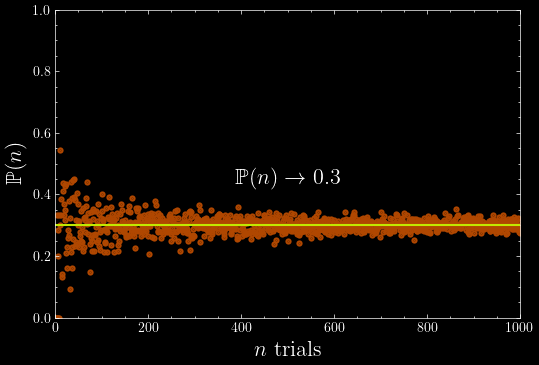

In [1011]:
def cointoss():
    coinface = ['H', 'T']
    randomFace = choice(  # argument i is the function coinselect(). Depending on random selection of coin, the corresponding probability of heads is chosen.
        coinface, 1, p=[0.3, 0.7])
    return randomFace.tolist()[0]

def iteration(n):
    prob = []
    for i in range(1,n+1):
        prob.append(cointoss())
    return prob

def trials(n):
    prob = []
    for i in range(1,n+1):
        prob.append(iteration(i).count('H')/i)
    return prob

n = 1000

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
plt.scatter(list(range(1,n+1)), trials(n), marker='.', color="#b04700", linewidths=3) 
plt.text(n/2, 0.45, '$\mathbb{P}(n) \\rightarrow 0.3$', ha='center', va='center', fontsize=16)
plt.hlines(0.3, 0, n, colors="#c2e700", linestyles='solid', linewidths=1.5)
plt.xlabel('$n$ trials', fontsize=16)
plt.ylabel('$\mathbb{P}(n)$', fontsize=16)
plt.xlim(0,n)
plt.ylim(0,1)
plt.savefig('chap1ex21i.eps', format='eps')
plt.show()



Failed to find a Ghostscript installation.  Distillation step skipped.


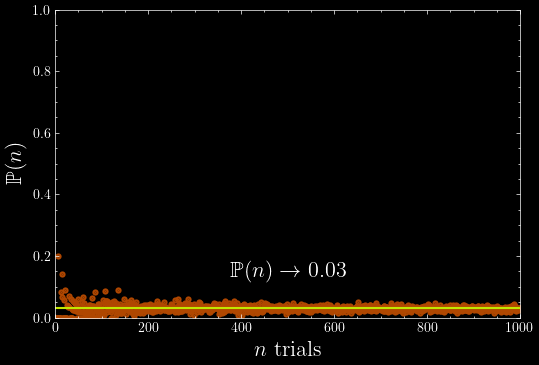

In [1010]:
def cointoss():
    coinface = ['H', 'T']
    randomFace = choice(  # argument i is the function coinselect(). Depending on random selection of coin, the corresponding probability of heads is chosen.
        coinface, 1, p=[0.03, 0.97])
    return randomFace.tolist()[0]

def iteration(n):
    prob = []
    for i in range(1,n+1):
        prob.append(cointoss())
    return prob

def trials(n):
    prob = []
    for i in range(1,n+1):
        prob.append(iteration(i).count('H')/i)
    return prob

n = 1000

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
plt.scatter(list(range(1,n+1)), trials(n), marker='.', color="#b04700", linewidths=3) 
plt.text(n/2, 0.15, '$\mathbb{P}(n) \\rightarrow 0.03$', ha='center', va='center', fontsize=16)
plt.hlines(0.03, 0, n, colors="#c2e700", linestyles='solid', linewidths=1.5)
plt.xlabel('$n$ trials', fontsize=16)
plt.ylabel('$\mathbb{P}(n)$', fontsize=16)
plt.xlim(0,n)
plt.ylim(0,1)
plt.savefig('chap1ex21ii.eps', format='eps')
plt.show()

22. (Computer Experiment.) Suppose we flip a coin $n$ times and let $p$ denote the probability of heads. Let $X$ be the number of heads. We call $X$ a binomial random variable, which is discussed in the next chapter. Intuition suggests that $X$ will be close to $np$. To see if this is true, we can repeat this experiment many times and average the $X$ values. Carry out a simulation and compare the average of the $X$'s to $np$. Try this for $p = .3$ and $n=10, n = 100,$ and $n = 1,000$.

In [1044]:
from statistics import mean

def cointoss():
    coinface = ['H', 'T']
    randomFace = choice(  # argument i is the function coinselect(). Depending on random selection of coin, the corresponding probability of heads is chosen.
        coinface, 1, p=[0.3, 0.7])
    return randomFace.tolist()[0]  

def trials(n, k):
    trials = []
    for j in range(1,k+1):
        probs = []
        for i in range(1,n+1):
            probs.append(cointoss())
        trialcount = probs.count('H')
        trials.append(trialcount)
    return trials

p, n1, n2, n3, k = 0.3, 10, 100, 1000, 1000 # n's are the numbers of times we flip coin, k is number of experiment trials
print("Running an experiment of", n1, "flips over", k, "trials, we average", mean(trials(n1,k)), "heads, compared to np =", n1*p)
print("Running an experiment of", n2, "flips over", k, "trials, we average", mean(trials(n2,k)), "heads, compared to np =", n2*p)
print("Running an experiment of", n3, "flips over", k, "trials, we average", mean(trials(n3,k)), "heads, compared to np =", n3*p)

Running an experiment of 10 flips over 1000 trials, we average 2.996 heads, compared to np = 3.0
Running an experiment of 100 flips over 1000 trials, we average 29.958 heads, compared to np = 30.0
Running an experiment of 1000 flips over 1000 trials, we average 299.92 heads, compared to np = 300.0


23. (Computer Experiment.) Here we will get some experience simulating conditional probabilities. Consider tossing a fair die. Let $A = \{2, 4, 6\}$ and $B = \{1,2,3,4\}$. Then, $\mathbb{P}(A) = 1/2, \mathbb{P}(B) = 2/3$, and $\mathbb{P}(AB) = 1/3$. Since $\mathbb{P}(AB) = \mathbb{P}(A)\mathbb{P}(B)$, the events $A$ and $B$ are independent. Simulate draws from the sample space and verify that $\widehat{\mathbb{P}}(AB) = \widehat{\mathbb{P}}(A)\widehat{\mathbb{P}}(B)$ where $\widehat{\mathbb{P}}(A)$ is the proportion of times $A$ occurred in the simulation and similarly for $\widehat{\mathbb{P}}(AB)$ and $\widehat{\mathbb{P}}(B)$. Now find two events $A$ and $B$ that are not independent. Compute $\widehat{\mathbb{P}}(A), \widehat{\mathbb{P}}(B)$ and $\widehat{\mathbb{P}}(AB)$. Compare the calculated values to their theoretical values. Report your results and interpret.

In [1092]:
def dice():
    return random.randint(1,6)

def rolls(n): # n is number of rolls
    sample = []
    for i in range(1,n+1):
        sample.append(dice())
    return sample

n = 10000

# P(A)
prob_A = (rolls(n).count(2) + rolls(n).count(4) + rolls(n).count(6))/n

# P(B)
prob_B = (rolls(n).count(1) + rolls(n).count(2) + rolls(n).count(3) + rolls(n).count(4))/n

# P(AB)
prob_AB = (rolls(n).count(2) + rolls(n).count(4))/n

print("P(A)P(B) =", prob_A*prob_B, "and P(AB) =", prob_AB, ". Thus A and B are independent.")



P(A)P(B) = 0.33324962 and P(AB) = 0.3353 . Thus A and B are independent.


Now suppose we have $A = B = \{k\}$ where $k$ is any integer $1, ..., 6$. Then $\mathbb{P}(A) = \mathbb{P}(B) = \mathbb{P}(AB) = 1/6$, but $\mathbb{P}(A)\mathbb{P}(B) = 1/36$. Thus $A$ and $B$ are not independent. In general, we can conclude that any event cannot be independent of itself unless the probability of the event is either 0 or 1.

In [1094]:
def dice():
    return random.randint(1,6)

def rolls(n): # n is number of rolls
    sample = []
    for i in range(1,n+1):
        sample.append(dice())
    return sample

n = 10000

# P(A)
prob_A = rolls(n).count(1)/n

# P(B)
prob_B = rolls(n).count(1)/n

# P(AB)
prob_AB = rolls(n).count(1)/n

print("P(A)P(B) =", prob_A*prob_B, "and P(AB) =", prob_AB, ". Thus A and B are not independent.")

P(A)P(B) = 0.0280353 and P(AB) = 0.1665 . Thus A and B are not independent.
